<a href="https://www.kaggle.com/code/vaibhavbawej07/spaceship-titanic-linear-and-logistic-regression?scriptVersionId=156972777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the libraries we will be using!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reading the training and testing data

In [2]:
spaceshiptrain=pd.read_csv(r'/kaggle/input/spaceship-titanic/train.csv')
spaceshiptest = pd.read_csv(r'/kaggle/input/spaceship-titanic/test.csv')

Observing the content in training and testing data

# Exploratory Data Analysis

In [3]:
spaceshiptest.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
spaceshiptrain.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Using the info() method to get information about  the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [5]:
spaceshiptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Now we use the describe() function to get statistics of the numerical data in dataset

In [6]:
spaceshiptrain.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
spaceshiptrain.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Plotting the numerical data on histogram

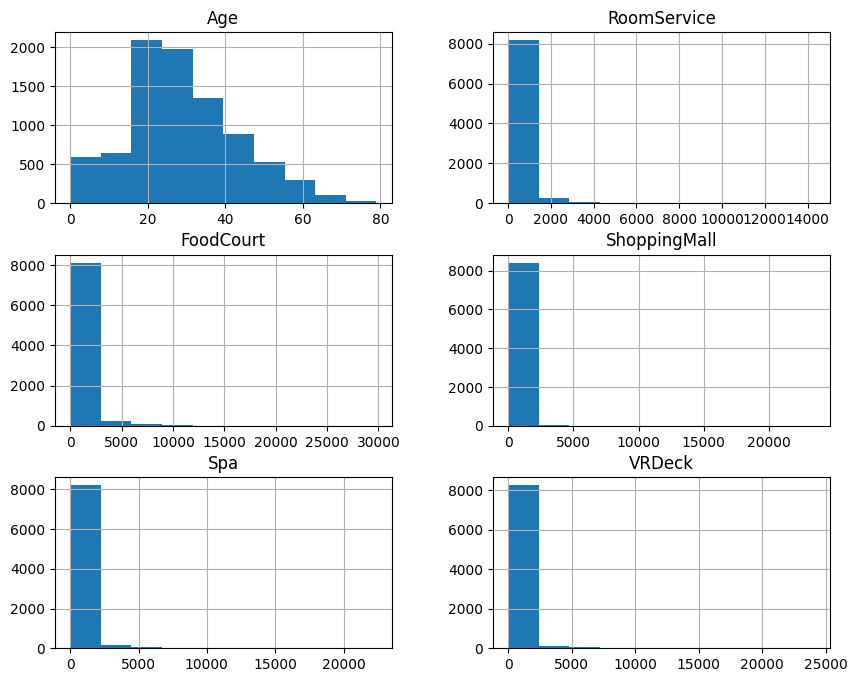

In [8]:
spaceshiptrain.hist(figsize=(10,8))
plt.show()               

### Plotting textual data on graph

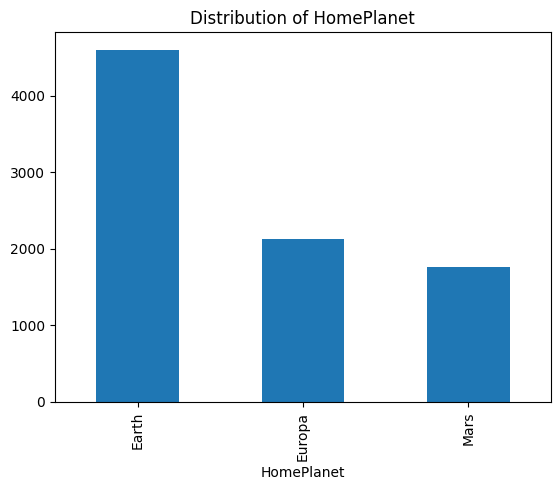

In [9]:
spaceshiptrain['HomePlanet'].value_counts().plot(kind='bar')
plt.title('Distribution of HomePlanet')
plt.show()

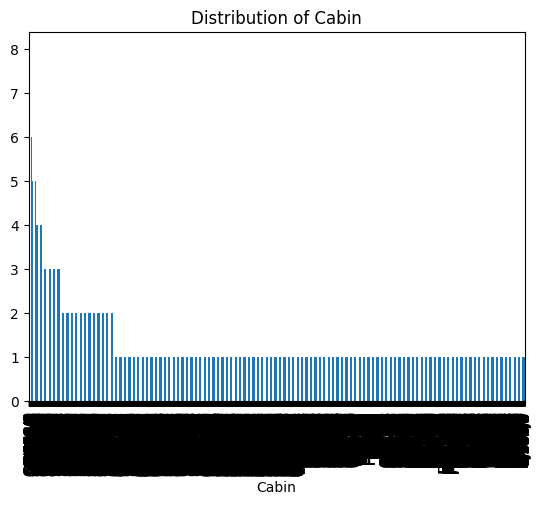

In [10]:
spaceshiptrain['Cabin'].value_counts().plot(kind='bar')
plt.title('Distribution of Cabin')
plt.show()

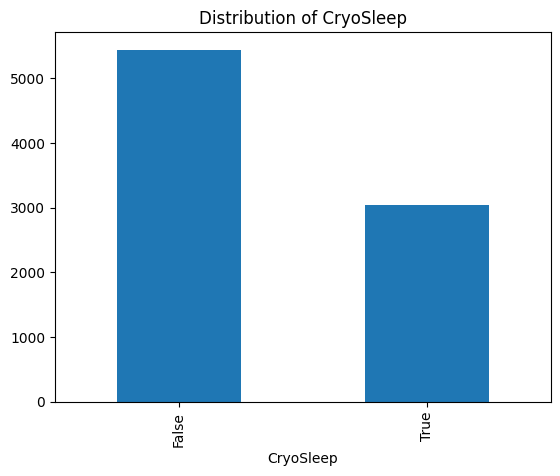

In [11]:
spaceshiptrain['CryoSleep'].value_counts().plot(kind='bar')
plt.title('Distribution of CryoSleep')
plt.show()

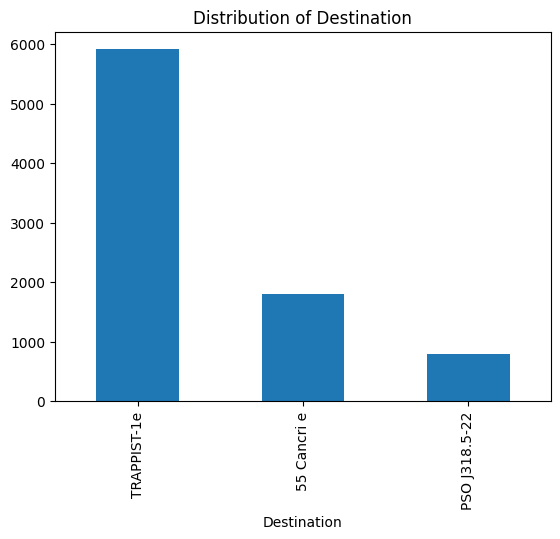

In [12]:
spaceshiptrain['Destination'].value_counts().plot(kind='bar')
plt.title('Distribution of Destination')
plt.show()

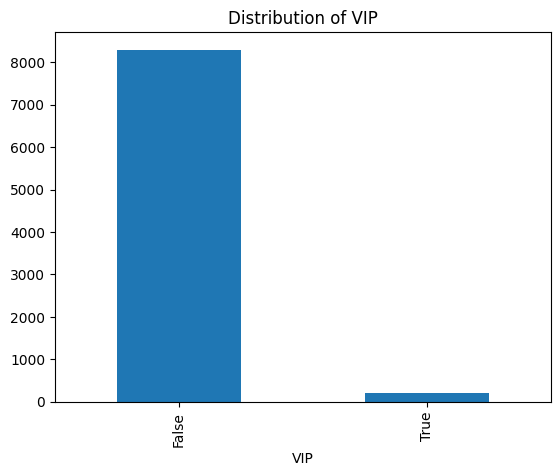

In [13]:
spaceshiptrain['VIP'].value_counts().plot(kind='bar')
plt.title('Distribution of VIP')
plt.show()

### Counting various categories in textual data

In [14]:
homeplanet_counts = spaceshiptrain['HomePlanet'].value_counts()
print("HomePlanet Counts:\n", homeplanet_counts)

# Count of passengers for each Cabin
cabin_counts = spaceshiptrain['Cabin'].value_counts()
print("\nCabin Counts:\n", cabin_counts)

# Count of transported vs. non-transported passengers
transport_counts = spaceshiptrain['Transported'].value_counts()
print("\nTransported Counts:\n", transport_counts)

HomePlanet Counts:
 HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

Cabin Counts:
 Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

Transported Counts:
 Transported
True     4378
False    4315
Name: count, dtype: int64


### Grouping Age and Homeplanet with other factors

In [15]:
# Average age for transported and non-transported passengers
average_age_by_transport = spaceshiptrain.groupby('Transported')['Age'].mean()
print("\nAverage Age by Transported:\n", average_age_by_transport)

# Total RoomService, FoodCourt, ShoppingMall, and Spa usage by HomePlanet
total_services_by_homeplanet = spaceshiptrain.groupby('HomePlanet')[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum()
print("\nTotal Services by HomePlanet:\n", total_services_by_homeplanet)


Average Age by Transported:
 Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64

Total Services by HomePlanet:
             RoomService  FoodCourt  ShoppingMall        Spa
HomePlanet                                                 
Earth          616094.0   618216.0      601088.0   642946.0
Europa         304261.0  3134199.0      314054.0  1769044.0
Mars           952642.0    93557.0      531452.0   189912.0


### Cross Tabulation between Vip status and Transported to find any correlation

In [16]:
# Cross-tabulation between VIP status and Transported
vip_transport_cross = pd.crosstab(spaceshiptrain['VIP'], spaceshiptrain['Transported'])
print("\nCross-tabulation between VIP and Transported:\n", vip_transport_cross)


Cross-tabulation between VIP and Transported:
 Transported  False  True 
VIP                      
False         4093   4198
True           123     76


In [17]:
# Cross-tabulation with percentages
vip_transport_cross_percentage = pd.crosstab(spaceshiptrain['VIP'], spaceshiptrain['Transported'], normalize='index') * 100
print("\nCross-tabulation between VIP and Transported (Percentages):\n", vip_transport_cross_percentage)


Cross-tabulation between VIP and Transported (Percentages):
 Transported      False      True 
VIP                              
False        49.366783  50.633217
True         61.809045  38.190955


Creating Label encoders for textual data

In [18]:
# Createing a label encoder
label_encoder = LabelEncoder()
# Applying label encoding to relevant columns
spaceshiptrain['HomePlanet'] = label_encoder.fit_transform(spaceshiptrain['HomePlanet'])
spaceshiptrain['Cabin'] = label_encoder.fit_transform(spaceshiptrain['Cabin'])
spaceshiptrain['Destination'] = label_encoder.fit_transform(spaceshiptrain['Destination'])
spaceshiptrain['Name'] = label_encoder.fit_transform(spaceshiptrain['Name'])
spaceshiptrain['CryoSleep'] = label_encoder.fit_transform(spaceshiptrain['CryoSleep'])
spaceshiptrain['VIP'] = label_encoder.fit_transform(spaceshiptrain['VIP'])
print(spaceshiptrain.head())

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01           1          0    149            2  39.0    0   
1     0002_01           0          0   2184            2  24.0    0   
2     0003_01           1          0      1            2  58.0    1   
3     0003_02           1          0      1            2  33.0    0   
4     0004_01           0          0   2186            2  16.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  Transported  
0          0.0        0.0           0.0     0.0     0.0  5252        False  
1        109.0        9.0          25.0   549.0    44.0  4502         True  
2         43.0     3576.0           0.0  6715.0    49.0   457        False  
3          0.0     1283.0         371.0  3329.0   193.0  7149        False  
4        303.0       70.0         151.0   565.0     2.0  8319         True  


### Checking for Null Values 

In [19]:
spaceshiptrain.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64

### Filling Null values with mean of that column

In [20]:
spaceshiptrain['Age'].fillna(spaceshiptrain['Age'].mean(), inplace=True)
spaceshiptrain['RoomService'].fillna(spaceshiptrain['RoomService'].mean(), inplace=True)
spaceshiptrain['FoodCourt'].fillna(spaceshiptrain['FoodCourt'].mean(), inplace=True)
spaceshiptrain['ShoppingMall'].fillna(spaceshiptrain['ShoppingMall'].mean(), inplace=True)
spaceshiptrain['Spa'].fillna(spaceshiptrain['Spa'].mean(), inplace=True)
spaceshiptrain['VRDeck'].fillna(spaceshiptrain['VRDeck'].mean(), inplace=True)

### Creating Label encoder and filling null values for test data

In [21]:
# Createing a label encoder
label_encoder = LabelEncoder()
# Applying label encoding to relevant columns
spaceshiptest['HomePlanet'] = label_encoder.fit_transform(spaceshiptest['HomePlanet'])
spaceshiptest['Cabin'] = label_encoder.fit_transform(spaceshiptest['Cabin'])
spaceshiptest['Destination'] = label_encoder.fit_transform(spaceshiptest['Destination'])
spaceshiptest['Name'] = label_encoder.fit_transform(spaceshiptest['Name'])
spaceshiptest['CryoSleep'] = label_encoder.fit_transform(spaceshiptest['CryoSleep'])
spaceshiptest['VIP'] = label_encoder.fit_transform(spaceshiptest['VIP'])
print(spaceshiptest.head())

  PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0013_01           0          1   2784            2  27.0    0   
1     0018_01           0          0   1867            2  19.0    0   
2     0019_01           1          1    257            0  31.0    0   
3     0021_01           1          0    259            2  38.0    0   
4     0023_01           0          0   1940            2  20.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Name  
0          0.0        0.0           0.0     0.0     0.0  2912  
1          0.0        9.0           0.0  2823.0     0.0  2406  
2          0.0        0.0           0.0     0.0     0.0  3376  
3          0.0     6652.0           0.0   181.0   585.0  2711  
4         10.0        0.0         635.0     0.0     0.0   668  


In [22]:
spaceshiptest['Age'].fillna(spaceshiptest['Age'].mean(), inplace=True)
spaceshiptest['RoomService'].fillna(spaceshiptest['RoomService'].mean(), inplace=True)
spaceshiptest['FoodCourt'].fillna(spaceshiptest['FoodCourt'].mean(), inplace=True)
spaceshiptest['ShoppingMall'].fillna(spaceshiptest['ShoppingMall'].mean(), inplace=True)
spaceshiptest['Spa'].fillna(spaceshiptest['Spa'].mean(), inplace=True)
spaceshiptest['VRDeck'].fillna(spaceshiptest['VRDeck'].mean(), inplace=True)

In [23]:
spaceshiptest.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [24]:
spaceshiptrain.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

# Linear regression

In [25]:
X= spaceshiptrain.drop(columns='Transported')
y= spaceshiptrain['Transported']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

### Predicting and caclualting Mean squared Error

In [26]:
y_val_pred = reg.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse)


Mean Squared Error on Validation Set: 0.18199782894606711


In [27]:
reg.score(X_train, y_train)*100

29.807966203458104

In [28]:
X_test = spaceshiptest[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name']]
test_predictions = reg.predict(X_test)
print(test_predictions)


[0.68231861 0.15986173 0.86515481 ... 0.94581732 0.54704566 0.72563607]


In [29]:
test_predictions = reg.predict(X_test)
print(test_predictions.astype('bool'))

[ True  True  True ...  True  True  True]


In [30]:
# 3. Combine "PassengerId," "Transported," and predicted values into a final DataFrame
final_results = pd.DataFrame({
    'PassengerId': spaceshiptest['PassengerId'],
    'PredictedTransported': test_predictions.astype('bool')
})
print(final_results)

     PassengerId  PredictedTransported
0        0013_01                  True
1        0018_01                  True
2        0019_01                  True
3        0021_01                  True
4        0023_01                  True
...          ...                   ...
4272     9266_02                  True
4273     9269_01                  True
4274     9271_01                  True
4275     9273_01                  True
4276     9277_01                  True

[4277 rows x 2 columns]


In [31]:
reg.intercept_

0.5496068684280385

## As we can see the score on linear regression is 29.807966203458104 which is very low hence we will try logistic regression

# Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
 y_val_pred = logreg.predict(X_val)

In [34]:
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
classification_report_str = classification_report(y_val, y_val_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.7602070155261644
Confusion Matrix:
[[591 270]
 [147 731]]
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.69      0.74       861
        True       0.73      0.83      0.78       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



### Our Accuracy here on train data is 76 percent hence we will go ahead with these calculations

In [35]:
logreg.score(X_train, y_train)*100

77.25050330744895

In [36]:
X_test = spaceshiptest[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name']]
logreg_test_predictions = logreg.predict(X_test)
print(logreg_test_predictions)

[ True False  True ...  True  True  True]


In [37]:
final_results = pd.DataFrame({
    'PassengerId': spaceshiptest['PassengerId'],
    'Transported': logreg_test_predictions.astype('bool')
})
final_results.head(20)
final_results.to_csv('submission.csv',index=False)